In [1]:
y(x) = 7x + 5

y (generic function with 1 method)

In [2]:
x = 0 : 0.1 : 5

0.0:0.1:5.0

In [3]:
using Plots

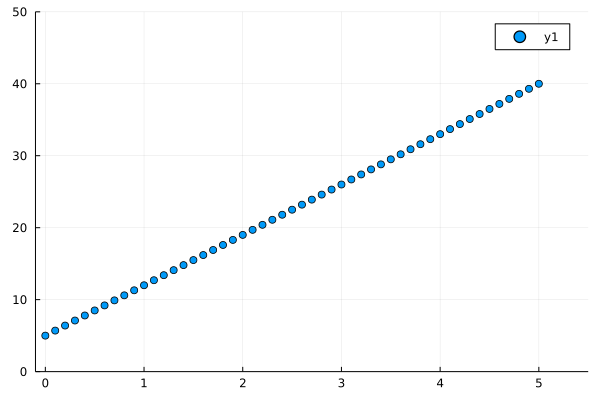

In [4]:
scatter_plot = scatter(x, y.(x), xlims = (-0.1, 5.5), ylims = (0, 50))

In [5]:
permutations = ((u, v) for u in 1:2 for v in 1:2)

for permutation in permutations
    print(permutation, " ")
end

(1, 1) (1, 2) (2, 1) (2, 2) 

In [6]:
m, c = (5, 7)
println("m = ", m)
println("c = ", c)

m = 5
c = 7


In [7]:
function mutate(value, mutations = 10)
    [value + rand() - 0.5 for i in 1:mutations]
end

function mutate(mc::Tuple, number_of_mutations = 10)
    m, c = mc
    ms = mutate(m, number_of_mutations)
    cs = mutate(c, number_of_mutations)
    
    [(ms[i], cs[i]) for i in 1:number_of_mutations]
end

mutate (generic function with 4 methods)

In [8]:
mutate((1, 2))

10-element Vector{Tuple{Float64, Float64}}:
 (0.9234006696693529, 2.180132057055089)
 (1.2863435325636572, 2.467952946755514)
 (1.401975453129533, 2.03952946092691)
 (0.9797040621605024, 2.239755749110408)
 (1.2274876772351018, 1.530872405349276)
 (1.0156746555048237, 1.979616079664833)
 (1.0639463967703429, 1.7090360055218423)
 (0.8581887988390702, 1.9329616062447736)
 (0.5316561150089978, 2.421779661131035)
 (1.1700567297227016, 1.6162529452799186)

In [9]:
∆(m, c, x, y) = (m * x + c) - y

∆ (generic function with 1 method)

In [10]:
∆(5, 4, 10, y(10))

-21

In [11]:
function total_error(m, c, x, y)
    ΣΔ = 0
    
    for i in 1:length(x)
        ΣΔ += abs(∆(m, c, x[i], y[i]))
    end
    
    ΣΔ
end

total_error (generic function with 1 method)

In [12]:
total_error(5, 4, [1, 2, 3, 4, 5], [1, 2, 3, 4, 5])

80

In [13]:
function top_survivors(mcs, x_train, y_train, top_percent = 10)
    errors_and_values = []
    
    for mc in mcs
        m, c = mc
        error = total_error(m, c, x_train, y_train)
        push!(errors_and_values, (error, mc))
    end

    
    sorted_errors_and_values = sort(errors_and_values)
    end_number = Int(length(mcs) * top_percent / 100)
    sorted_errors_and_values[1:end_number]
end

top_survivors (generic function with 2 methods)

In [14]:
x_train = [1, 2, 3, 4, 5]
y_train = y.(x_train)
mcs = mutate((0, 0))

10-element Vector{Tuple{Float64, Float64}}:
 (-0.4490485425788385, -0.3889296452148121)
 (0.13832002967556833, -0.2547152142096829)
 (-0.1913259994823765, -0.10467999460192445)
 (-0.12635085457735973, -0.27737375757387306)
 (0.35874303537021535, -0.21904468121069243)
 (0.4641300860333145, 0.36083078082159337)
 (-0.021366569982474992, 0.2964278780573998)
 (0.4391825394105693, 0.09664903907319822)
 (-0.34318470621654085, -0.34230012697613343)
 (0.014904614586734088, 0.4875261366261635)

In [15]:
top_survivors(mcs, x_train, y_train)

1-element Vector{Any}:
 (121.23389480539231, (0.4641300860333145, 0.36083078082159337))

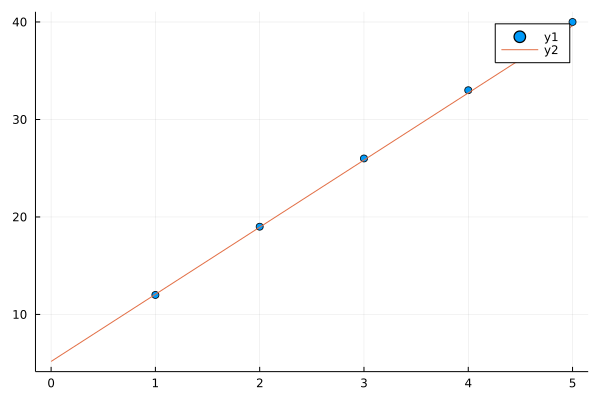

In [16]:
generations = 40

top_survivor = Nothing
mc = (0, 0)

for i in 1:generations
    mcs = mutate(mc)
    top_survivor = top_survivors(mcs, x_train, y_train)[1]
    _error, mc = top_survivor
end

hm, hc = mc
p = scatter(x_train, y_train)
h(x) = hm * x + hc
plot!(p, x, h.(x))

┌ Info: Saved animation to 
│   fn = /Users/mindaslab/code/datascience_book_code/tmp.gif
└ @ Plots /Users/mindaslab/.julia/packages/Plots/9C6z9/src/animation.jl:114


Plots.AnimatedGif("/Users/mindaslab/code/datascience_book_code/tmp.gif")
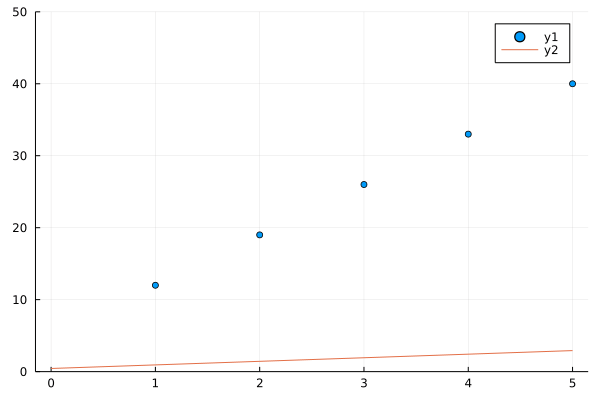

In [20]:
function fn()
    generations = 40

    top_survivor = Nothing
    mc = (0, 0)

    @gif for i in 1:generations
        mcs = mutate(mc)
        top_survivor = top_survivors(mcs, x_train, y_train)[1]
        _error, mc = top_survivor

        hm, hc = mc
        p = scatter(x_train, y_train)
        h(x) = hm * x + hc
        plot!(p, x, h.(x), ylims = (0, 50))
    end
end

fn()

In [18]:
mc

(0, 0)